# Transport across sections

`mom6_tools.section_transports` collection of functions for computing, plotting and saving time-series of transports across pre-defined vertical sections.

The goal of this notebook is the following:

1) server as an example on how to post-process the CESM/MOM6 sections defined in diag_table. The location of the current vertical sections computed online can be found at the end of [this notebook](https://gist.github.com/gustavo-marques/bd6e9bb43062dcbc2abda91b757c7c4b); 

2) evaluate model experiments by comparing transports against observed estimates;

3) compare model results vs. another model results (TODO).

In [28]:
%matplotlib inline
from mom6_tools.section_transports import Transport, options
import matplotlib.pyplot as plt
from mom6_tools.DiagsCase import DiagsCase
import numpy as np
import xarray as xr
import yaml, os

In [2]:
# # Read in the yaml file
# diag_config_yml_path = "diag_config.yml"
# diag_config_yml = yaml.load(open(diag_config_yml_path,'r'), Loader=yaml.Loader)

In [3]:
# Empty cell with "parameters" tag, papermill-provided parameters will be inserted below.

## Connecting to cluster

In [4]:
from dask.distributed import Client

if cluster_scheduler_address is None:
    pass
else:
    client = Client(cluster_scheduler_address)
    
    client

### This is the only cell that needs to be modified
Define the arguments expected by class "Transport". These have been hard-coded here fow now...

In [3]:
# create an empty class object
class args:
  pass

# Create the case instance
dcase = DiagsCase(diag_config_yml['Case'])
path = dcase.get_value('RUNDIR')
print('Run directory is:', path)
print('Casename is:', dcase.casename)

args.case_name = dcase.casename
args.infile = path + '/'
# set avg dates
avg = diag_config_yml['Avg']
### edited this to come from parameters
args.start_date = start_date # override start date
args.end_date = avg['end_date']
args.label = diag_config_yml['Case']['SNAME']
args.debug = False
plotSections = []

Run directory is: /glade/scratch/gmarques/gmom.e23.GJRAv4.TL319_t061_zstar_N65.nuopc.HBD.002/run
Casename is: gmom.e23.GJRAv4.TL319_t061_zstar_N65.nuopc.HBD.002


Observed flows, more options can be added here

* Griffies et al., 2016: OMIP contribution to CMIP6: experimental and diagnostic protocol for the physical component of the Ocean Model Intercomparison Project. Geosci. Model. Dev., 9, 3231-3296. doi:10.5194/gmd-9-3231-2016

In [4]:
observedFlows = {'Agulhas':(129.8,143.6), 'Barents Opening':2.0, 'Bering Strait':(0.7,1.1), 'Davis Strait':(-2.1,-1.1), 'Denmark Strait':(-4.8,-2.0),
                 'Drake Passage':(129.8,143.6), 'English Channel':(0.01,0.1), 'Faroe-Scotland':(0.8,1.0), 'Florida-Bahamas':(28.9,34.3),
                 'Fram Strait':(-4.7,0.7), 'Gibraltar Strait':0.11, 'Gibraltar Strait':(-1.0, 1.0), 'Iceland-Faroe':(4.35,4.85),
                 'Indonesian Throughflow':(-15.,-13.), 'Mozambique Channel':(-25.6,-7.8), 'Pacific Equatorial Undercurrent':(24.5,28.3),
                 'Taiwan-Luzon Strait':(-3.0,-1.8), 'Windward Passage':(-15.,5.)}
# We need some estimated transport for the following:
# Bab_al_mandeb_Strait
# Iceland-Norway
# Hormuz Strait

Below we define a function for plotting transport time series. Note the following:

<span style="color:green">green = mean transport is within observed values</span> 

<span style="color:red">red    = mean transport is not within observed values</span> 

<span style="color:gray">gray  = either there isn't observed values to compare with or just a mean value is available (not a range)</span> 

In [5]:
def plotPanel(section,observedFlows=None,colorCode=True):
    ax = plt.subplot(1,1,1)
    color = '#c3c3c3'; obsLabel = None
    if section.label in observedFlows.keys():
      if isinstance(observedFlows[section.label],tuple):
        if colorCode == True:
          if min(observedFlows[section.label]) <= section.data.mean() <= max(observedFlows[section.label]):
            color = '#90ee90'
          else: color = '#f26161'
        obsLabel = str(min(observedFlows[section.label])) + ' to ' + str(max(observedFlows[section.label]))
      else: obsLabel = str(observedFlows[section.label])
    plt.plot(section.time,section.data,color=color)
    plt.title(section.label,fontsize=14)
    plt.text(0.04,0.11,'Mean = '+'{0:.2f}'.format(section.data.mean()),transform=ax.transAxes,fontsize=14)
    if obsLabel is not None: plt.text(0.04,0.04,'Obs. = '+obsLabel,transform=ax.transAxes,fontsize=14)
    if section.ylim is not None: plt.ylim(section.ylim)
    plt.ylabel('Transport (Sv)',fontsize=14); plt.xlabel('Time since beginning of run (yr)',fontsize=14)
    return

Plot section transports in alphabetical order

### Agulhas Section

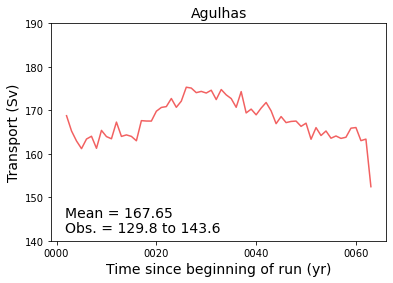

In [6]:
agulhas = Transport(args,'agulhas_section','umo',label='Agulhas',ylim=(140,190))
plotSections.append(agulhas)
plotPanel(agulhas, observedFlows=observedFlows)

### Bab al mandeb Strait (Red Sea)

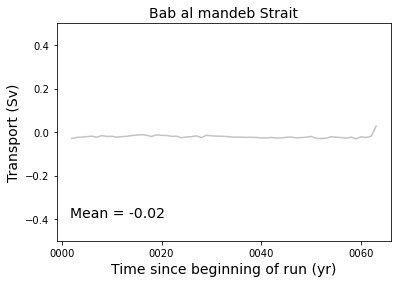

In [7]:
bab = Transport(args,'Bab_al_mandeb_Strait','umo',label='Bab al mandeb Strait',ylim=(-0.5, 0.5))
plotSections.append(bab)
plotPanel(bab, observedFlows=observedFlows)

### Bering Strait

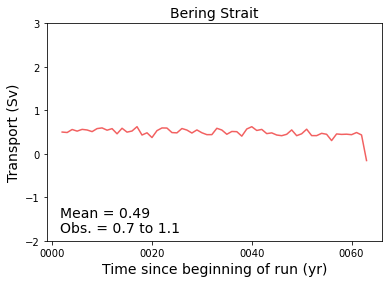

In [8]:
bering = Transport(args,'Bering_Strait','vmo',label='Bering Strait',ylim=(-2,3))
plotSections.append(bering)
plotPanel(bering, observedFlows=observedFlows)

### Barents opening

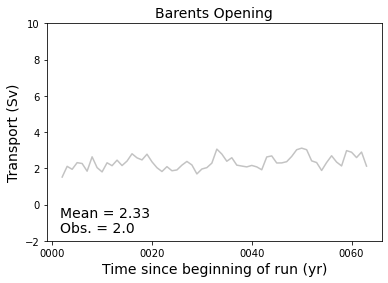

In [9]:
barents = Transport(args,'Barents_opening','vmo',label='Barents Opening',ylim=(-2,10))
plotSections.append(barents)
plotPanel(barents, observedFlows=observedFlows)

### Davis Strait

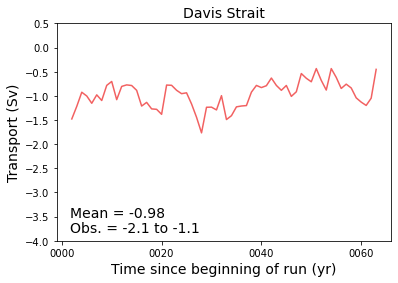

In [10]:
davis = Transport(args,'Davis_Strait','vmo',label='Davis Strait',ylim=(-4.0,0.5))
plotSections.append(davis)
plotPanel(davis, observedFlows=observedFlows)

### Denmark Strait

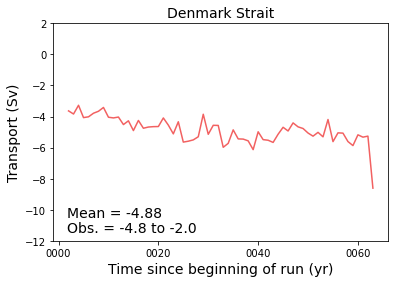

In [11]:
denmark = Transport(args,'Denmark_Strait','vmo',label='Denmark Strait',ylim=(-12,2))
plotSections.append(denmark)
plotPanel(denmark, observedFlows=observedFlows)

### Drake Passage

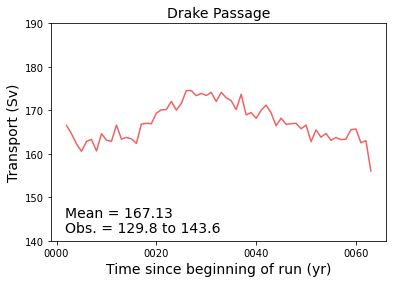

In [12]:
drake = Transport(args,'Drake_Passage','umo',label='Drake Passage',ylim=(140,190))
plotSections.append(drake)
plotPanel(drake, observedFlows=observedFlows)

### English Channel

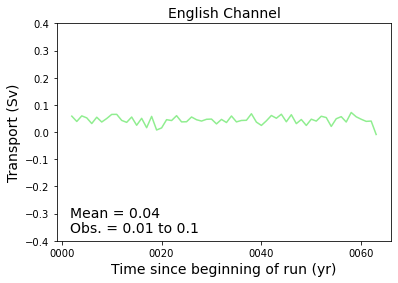

In [13]:
english = Transport(args,'English_Channel','umo',label='English Channel',ylim=(-0.4,0.4))
plotSections.append(english)
plotPanel(english, observedFlows=observedFlows)

### Florida Bahamas

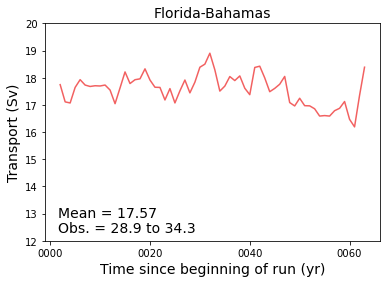

In [14]:
florida = Transport(args,'Florida_Bahamas','vmo',label='Florida-Bahamas',ylim=(12,20))
plotSections.append(florida)
plotPanel(florida, observedFlows=observedFlows)

### Fram Strait

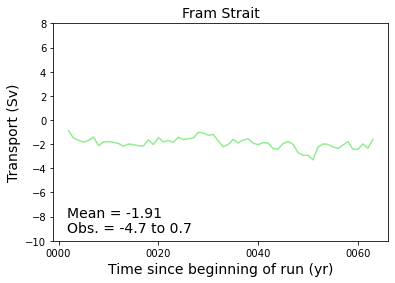

In [15]:
fram = Transport(args,'Fram_Strait','vmo',label='Fram Strait',ylim=(-10,8))
plotSections.append(fram)
plotPanel(fram, observedFlows=observedFlows)

### Gibraltar Strait

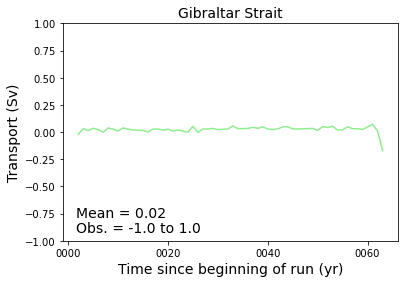

In [16]:
gibraltar = Transport(args,'Gibraltar_Strait','umo',label='Gibraltar Strait',ylim=(-1.0,1.0))
plotSections.append(gibraltar)
plotPanel(gibraltar, observedFlows=observedFlows)

### Hormuz Strait (Persian Gulf or Arabic Sea)

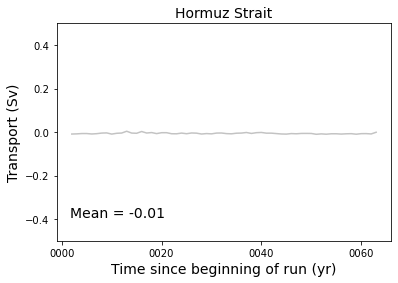

In [17]:
hormuz = Transport(args,'Hormuz_Strait','umo',label='Hormuz Strait',ylim=(-0.5,0.5))
plotSections.append(hormuz)
plotPanel(hormuz, observedFlows=observedFlows)

### Iceland Norway

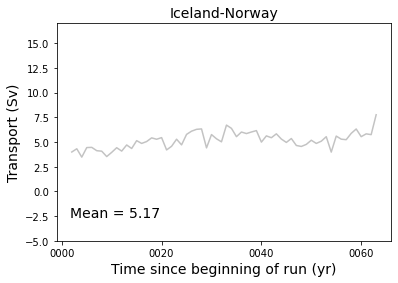

In [18]:
iceland = Transport(args,'Iceland_Norway','vmo',label='Iceland-Norway',ylim=(-5,17))
plotSections.append(iceland)
plotPanel(iceland, observedFlows=observedFlows) 

### Indonesian Throughflow

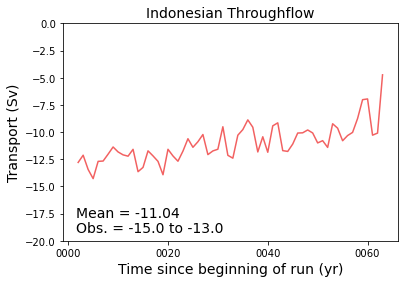

In [19]:
indo = Transport(args,'Indonesian_Throughflow','vmo',label='Indonesian Throughflow',ylim=(-20,0))
plotSections.append(indo)
plotPanel(indo, observedFlows=observedFlows)

### Mozambique Channel

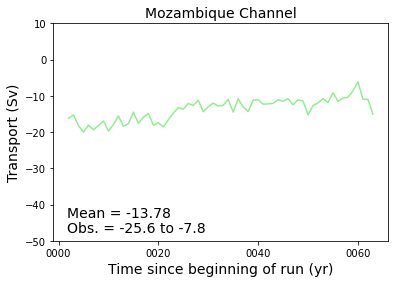

In [20]:
mozambique = Transport(args,'Mozambique_Channel','vmo',label='Mozambique Channel',ylim=(-50,10))
plotSections.append(mozambique)
plotPanel(mozambique, observedFlows=observedFlows)

### Pacific undercurrent

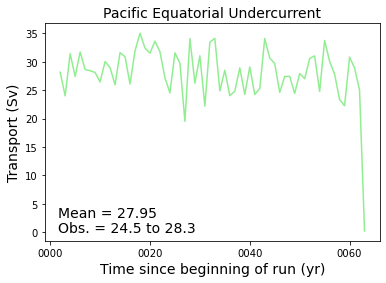

In [21]:
euc = Transport(args,'Pacific_undercurrent','umo',label='Pacific Equatorial Undercurrent',ylim=None, zlim=(0,350))
plotSections.append(euc)
plotPanel(euc, observedFlows=observedFlows)

### Taiwan Luzon

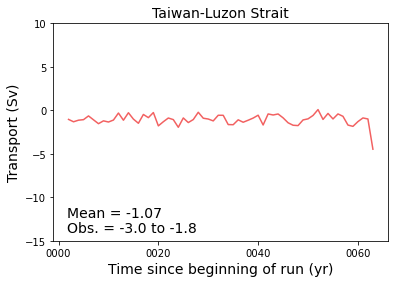

In [22]:
taiwan = Transport(args,'Taiwan_Luzon','umo',label='Taiwan-Luzon Strait',ylim=(-15,10))
plotSections.append(taiwan)
plotPanel(taiwan, observedFlows=observedFlows)

### Windward Passage

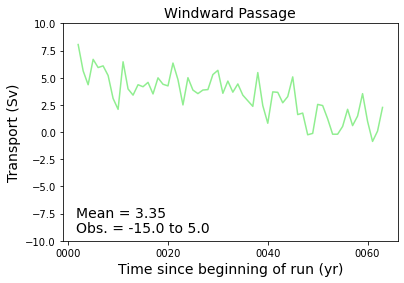

In [23]:
windward = Transport(args,'Windward_Passage','vmo',label='Windward Passage',ylim=(-10,10))
plotSections.append(windward)
plotPanel(windward, observedFlows=observedFlows)

### Save netCDF file with transports

In [30]:
if not os.path.isdir('../ncfiles'):
    os.system('mkdir ../ncfiles');

save_path = os.path.abspath('../ncfiles')
    
labels = [];
for n in range(len(plotSections)): 
    labels.append(plotSections[n].label)

var = np.zeros((len(plotSections),len(plotSections[0].time)))
ds = xr.Dataset(data_vars={ 'transport' : (('sections', 'time'), var)},
                       coords={'sections': labels,
                               'time': plotSections[0].time})
for n in range(len(plotSections)):
  ds.transport.values[n,:] = plotSections[n].data

ds.to_netcdf(save_path + '/'+args.case_name+'_section_transports.nc')